In [1]:
using PyCall
using PyPlot
using Dates
pushfirst!(PyVector(pyimport("sys")."path"), "../")
br = pyimport("binance_request")
binance = br.BinanceRequest()

PyObject <binance_request.BinanceRequest object at 0x7f954c33e850>

#### First, let's get current price

In [2]:
data = binance.makeRequest("/api/v3/ticker/price", params=Dict("symbol" => "DOGEBUSD"))
println(data)
println("SUCH!")

Dict{Any,Any}("price" => "0.31500000","symbol" => "DOGEBUSD")
SUCH!


#### Now, let's do get the latest trades, so we get an estimation of how to price evolves (as well as timestamps)

In [3]:
data = binance.makeRequest("/api/v3/trades", params=Dict("symbol" => "DOGEBUSD", "limit" => "666"));
println(length(data))

666


In [4]:
times = Array{Int64, 1}()
prices = Array{Float64, 1}()
for item in data
    if !item["isBuyerMaker"]
        continue
    end
    time = item["time"]
    price = parse(Float64, item["price"])
    push!(prices, price)
    push!(times, time)
end
@assert times[1] == minimum(times)
@assert times[length(times)] == maximum(times)

#### Convert timestamps to seconds

In [5]:
grad(x) = [x[i + 1] - x[i] for i in 1 : length(x)-1]
mean(x) = sum(x) / length(x)
_times = times ./ 1000

println("Total buyers: ", length(times))
minTime, maxTime = minimum(_times), maximum(_times)
diffTime = unix2datetime(maxTime - minTime)
println("Orders from ", unix2datetime(minTime), " up to ", unix2datetime(maxTime), ". Diff seconds: ", minute(diffTime) * 60 + second(diffTime))
diff = unix2datetime.(_times .- minTime)
diffSeconds = minute.(diff) * 60 + second.(diff)
println("A buy happens every ", mean(grad(diffSeconds)), " seconds for doge!")

Total buyers: 208
Orders from 2021-04-18T09:32:24.933 up to 2021-04-18T09:33:36.716. Diff seconds: 71
A buy happens every 0.34299516908212563 seconds for doge!


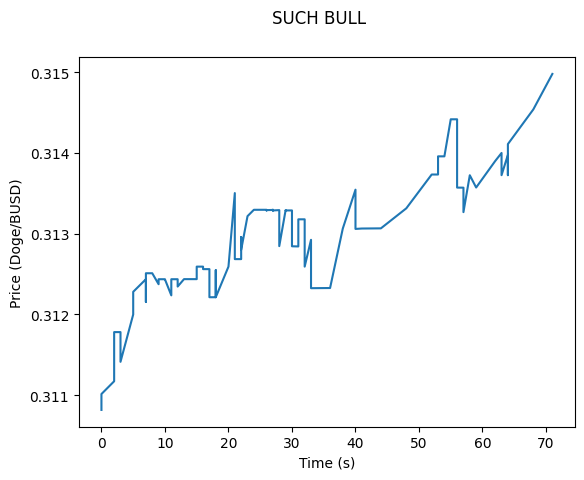

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [6]:
title = prices[length(prices)] > prices[1] ? "SUCH BULL" : "DOGE IS BEAR :("
plot(diffSeconds, prices)
ylabel("Price (Doge/BUSD)")
xlabel("Time (s)")
suptitle(title)
show()